In [50]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

Function declarations

In [28]:
def find_cost(x_vector, z = Z):
    subs_dict = {ind_var[i]: x_vector[i] for i in range(len(ind_var))}
    cost = z.subs(subs_dict)
    return cost


def substitute(g, x_vector):
    subs_dict = {ind_var[i]: x_vector[i] for i in range(len(ind_var))}
    substituted_g = np.array([expr.subs(subs_dict) for expr in g])
    return substituted_g

def get_norm(vector):
    norm = 0
    for i in vector:
        norm += i**2
    return math.sqrt(norm)

def check_wolfe(alpha, x, xk, gk, d):
    f = find_cost(x)
    fk = find_cost(xk)
    gk_1 = substitute(gk, xk)
    rho = 0.01

    t1 = fk <= f + rho*alpha*np.dot(gk, d)
    t2 = np.dot(gk_1, d) >= -0.01*np.dot(gk, d)

    return t1 and t2

def beta_FR(gk, gk_1):
    return np.dot(gk_1, gk)/np.dot(gk_1, gk)

def beta_HS(gk_1, yk, dk):
    return np.dot(gk_1, yk)/np.dot(yk, dk)

def powell_restart(gk_1, gk):
    lhs = abs(np.dot(gk_1, gk))
    rhs = 0.2*get_norm(gk)
    return lhs >= rhs

Initialization

In [38]:

x, y = sp.symbols("x y")
ind_var = ['x', 'y']

Z = x**2 + y + 3
costs = []

g = []

for i in ind_var:
    var_dash = sp.Derivative(Z, i)
    g.append(var_dash.doit())

g = np.array(g)
epsilon = 0.01
xk = np.array([1, 1], dtype="float64")

dk = -substitute(g, xk)

norm = get_norm(dk)
alpha = 1/norm



Minimization

In [57]:
count = 100
while(1): #get_norm(dk) > epsilon
   
    """Line search"""
   
    xk_1 = xk + alpha*dk     
    gk = substitute(g, xk)
    gk_1 = substitute(g, xk_1)
    yk = gk_1 - gk
    sk = xk_1 - xk

    truth = check_wolfe(alpha, xk, xk_1, gk, dk)
    if truth == False:
        pass

    """Directional computation"""


    rk_1 = (beta_FR(gk, gk_1)/beta_HS(gk_1, yk, dk)) + (np.dot(gk_1, yk)/np.dot(yk,dk))

    if rk_1 >= 1 or rk_1 <= 0:
        rk_1 = 1

    dk_1 = None
    
    if powell_restart(gk_1, gk) == True:
        dk_1 = -rk_1*gk_1
    else:
        dk_1 = -rk_1*gk_1 + beta_FR(gk, gk_1)*dk
        alpha = alpha*get_norm(dk)/get_norm(dk_1)
    dk = dk_1
    xk = xk_1
    costs.append(find_cost(xk))
    print(dk)
    print(get_norm(dk))
    count -= 1
    if count == 0:
        break
    

    
    
    

    

[-5.27062955636777e-81485 -1]
1.0
[-5.56435167464613e-81486 -1]
1.0
[-5.87444236556714e-81487 -1]
1.0
[-6.20181381842022e-81488 -1]
1.0
[-6.54742905706161e-81489 -1]
1.0
[-6.91230477282766e-81490 -1]
1.0
[-7.29751431532104e-81491 -1]
1.0
[-7.70419084986768e-81492 -1]
1.0
[-8.13353069093276e-81493 -1]
1.0
[-8.58679682130167e-81494 -1]
1.0
[-9.06532260737811e-81495 -1]
1.0
[-9.57051572152875e-81496 -1]
1.0
[-1.01038622830126e-81496 -1]
1.0
[-1.06669312296764e-81497 -1]
1.0
[-1.12613789332766e-81498 -1]
1.0
[-1.18889540720038e-81499 -1]
1.0
[-1.25515027745443e-81500 -1]
1.0
[-1.32509740508099e-81501 -1]
1.0
[-1.39894255253123e-81502 -1]
1.0
[-1.47690294900470e-81503 -1]
1.0
[-1.55920792946934e-81504 -1]
1.0
[-1.64609960929283e-81505 -1]
1.0
[-1.73783359646985e-81506 -1]
1.0
[-1.83467974354041e-81507 -1]
1.0
[-1.93692294141115e-81508 -1]
1.0
[-2.04486395741480e-81509 -1]
1.0
[-2.15882032007309e-81510 -1]
1.0
[-2.27912725316577e-81511 -1]
1.0
[-2.40613866185356e-81512 -1]
1.0
[-2.5402281737

[3.56393202250021, 3.10569703380069, 2.65836059806230, 2.21114563343197, 1.76393202267221, 1.31671842700217, 0.869504831500316, 0.422291236000337, -0.0249223594996213, -0.472135954999579, -0.919349550499537, -1.36656314599950, -1.81377674149945, -2.26099033699941, -2.70820393249937, -3.15541752799933, -3.60263112349929, -4.04984471899925, -4.49705831449920, -4.94427190999916, -5.39148550549912, -5.83869910099908, -6.28591269649904, -6.73312629199899, -7.18033988749895, -7.62755348299891, -8.07476707849887, -8.52198067399883, -8.96919426949879, -9.41640786499874, -9.86362146049870, -10.3108350559987, -10.7580486514986, -11.2052622469986, -11.6524758424985, -12.0996894379985, -12.5469030334985, -12.9941166289984, -13.4413302244984, -13.8885438199983, -14.3357574154983, -14.7829710109982, -15.2301846064982, -15.6773982019982, -16.1246117974981, -16.5718253929981, -17.0190389884980, -17.4662525839980, -17.9134661794979, -18.3606797749979]


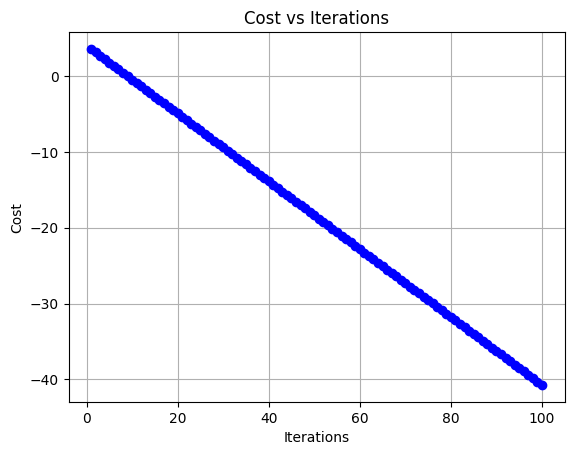

In [58]:
print(costs[:50])
iter = [i for i in range(1, 101)]

plt.plot(iter, costs[:100], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Show the plot
plt.grid(True)
plt.show()